In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""No se si esta permitido su uso por no ser matplotlib.pyplot pero solo la use para guardar las imagenes"""
import matplotlib.image as mpimg

In [3]:
def plot_all(image_array, gray=False):
    plt.figure().set_figwidth(30)
    plt.grid(False)
    plt.axis('off')
    if gray:
        plt.imshow(np.concatenate(image_array,axis=1), cmap='gray')
    else:
        plt.imshow(np.concatenate(image_array,axis=1))
    plt.show()


def plot_all2(image_array, gray=False):

    fig, *data =  plt.subplots(1, len(image_array))
    fig.set_figwidth(6*len(image_array))

    for n in range(len(data[0])):
        data[0][n].grid(False)
        data[0][n].axis('off')
        if gray:
            data[0][n].imshow(image_array[n], cmap='gray')
        else:
            data[0][n].imshow(image_array[n])

    plt.show()

In [12]:
def normal_2d(n, m, sigma, mu, gain=1, invert=1, base=1):
    x, y = np.meshgrid(np.linspace(-1,1,n)**2, np.linspace(-1,1,m)**2)
    H = np.exp((np.sqrt(x+y)-mu)**2 / ( -2 * sigma**2 ))
    H -= np.min(H)
    H /= np.max(H)
    if invert:
        return 1 - H * gain
    else:
        if base:
            return 1 + H * gain
        return H * gain

def FiltroFourier(image_n, data, show=False):
    image = plt.imread(f"J{image_n}.png")
    print(image.shape)
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)

    image_ft = np.fft.fftshift(np.fft.fft2(image))

    if show:
        print(show)
        plot_all([np.log(np.abs(1+image_ft))], gray=True)
        mpimg.imsave(f"J{image_n}_ft.png", np.log(np.abs(1+image_ft)), cmap='gray')


    for data_ in data:
        x_, y_, n, m = data_[:4]
        H = normal_2d(*data_[2:])
        image_ft[int(y_ - m/2 + 1):int(y_ + m/2 + 1), int(x_ - n/2 + 1):int(x_ + n/2 + 1)] *= H


    if show:
        # plot_all([H], gray=True)
        plot_all([np.log(np.abs(1+image_ft))], gray=True)
        mpimg.imsave(f"J{image_n}_ft_out.png", np.log(np.abs(1+image_ft)), cmap='gray')

    mpimg.imsave(f"J{image_n}_out.png", np.abs(np.fft.ifft2(np.fft.fftshift(image_ft))), cmap='gray')

    return np.fft.ifft2(np.fft.fftshift(image_ft))

(851, 851)
(851, 851)
1


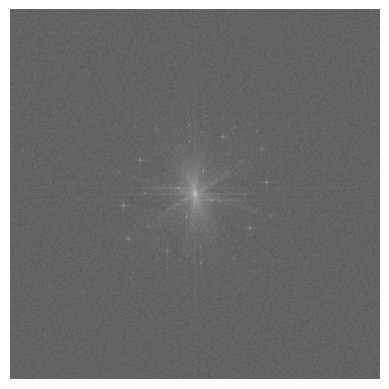

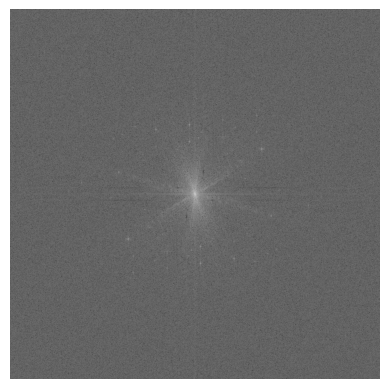

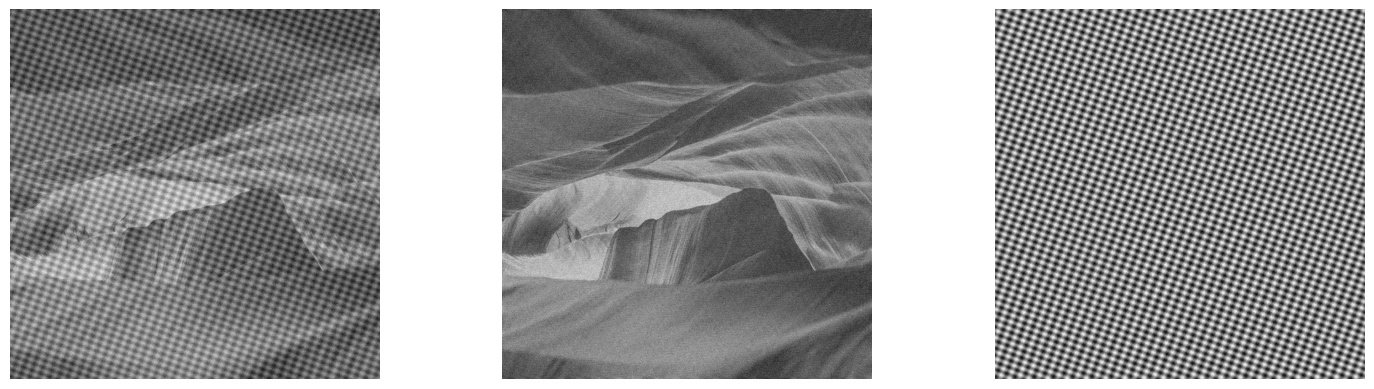

In [14]:
Y1 = [
np.abs(FiltroFourier(1, [], show=0)),
np.abs(FiltroFourier(1, [
    [444, 373,   7,   7, 0.9, 0, 1],
    [444, 373,   1, 100, 0.8, 0, 1],

    [406, 477,   7,   7, 0.9, 0, 1],
    [406, 477,   1, 100, 0.8, 0, 1],

    [386, 411,   7,   7, 0.9, 0, 1],
    [386, 411, 100,   1, 0.8, 0, 1],
    [286, 411, 300,   1, 1.0, 0.1, 0.9],
    [586, 411, 300,   1, 1.0, 0.1, 0.9],

    [464, 439,   7,   7, 0.8, 0, 1],
    [464, 439, 100,   1, 0.8, 0, 1],
    [564, 439, 300,   1, 1.0, 0.1, 0.9],
    [264, 439, 300,   1, 1.0, 0.1, 0.9],


    [310, 424,   7,   7, 0.9, 0, 1],

    [540, 427,   7,   7, 0.9, 0, 1],


    [260, 451,  10,  10, 0.9, 0, 0.95],
    [260, 451,   2,  50, 0.9, 0, 0.6],
    [260, 451,  50,   2, 0.9, 0, 0.6],


    [589, 398,  10,  10, 0.9, 0, 0.95],
    [589, 398,   2,  50, 0.9, 0, 0.6],
    [589, 398,  50,   2, 0.9, 0, 0.6],


    [489, 293,   9,   9, 0.9, 0, 0.8],
    [489, 293,   1,  60, 0.9, 0.1, 0.6],


    [361, 556,   9,   9, 0.9, 0, 0.8],
    [361, 556,   1,  60, 0.9, 0.1, 0.6],


    [298, 347,  10,   9, 0.9, 0, 0.9],
    [298, 347, 100,   1, 0.9, 0, 0.7],
    [298, 347,   2,  30, 0.9, 0, 0.7],


    [551, 503,  10,   9, 0.9, 0, 0.9],
    [551, 503, 100,   1, 0.9, 0, 0.7],
    [551, 503,   2,  30, 0.9, 0, 0.7],
], show=1)),
]
plot_all2(Y1 + [Y1[0] - Y1[1]], gray=True)

(851, 851)
(851, 851)


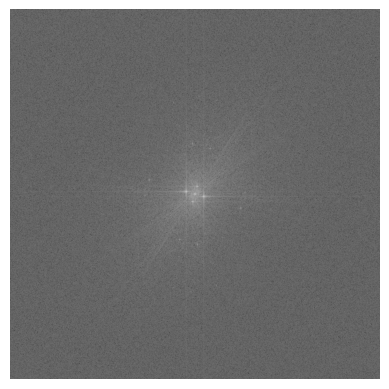

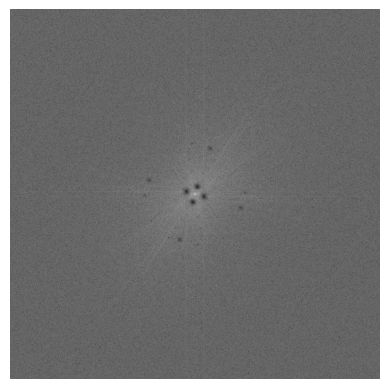

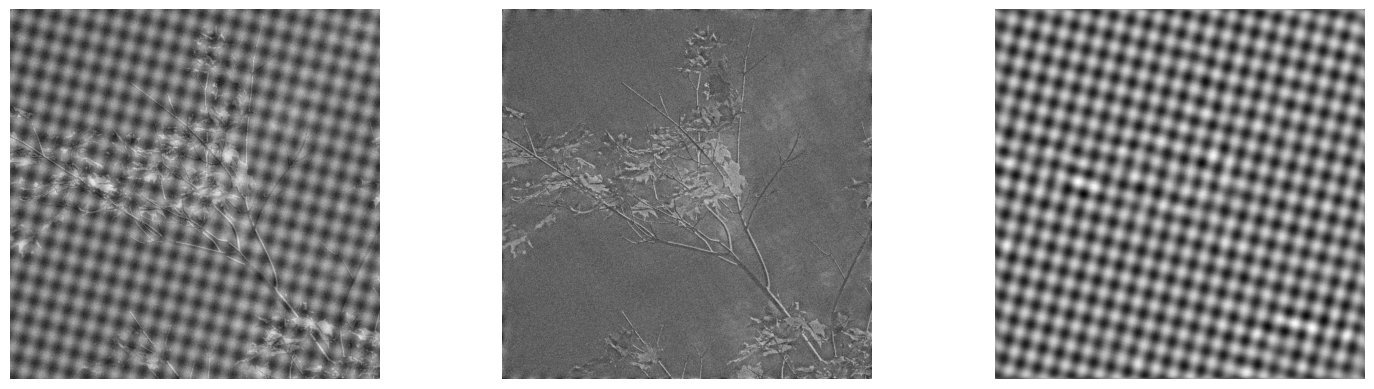

In [6]:
Y2 = [
np.abs(FiltroFourier(2, [], show=0)),
np.abs(FiltroFourier(2, [
    [446, 431, 100, 100, 0.15, 0],
    [405, 419, 100, 100, 0.15, 0],
    [430, 409, 100, 100, 0.15, 0],
    [420, 443, 100, 100, 0.15, 0],
    [445, 430,  19,  19, 1.0, 0, 1.0],
    [445, 430, 175,   2, 0.9, 0, 0.6],
    [445, 430,   1, 175, 0.9, 0, 0.9],
    [446, 430,   1, 175, 0.9, 0, 0.6],

    [405, 419,  19,  19, 1.0, 0, 1.0],
    [405, 419, 175,   2, 0.9, 0, 0.6],
    [405, 419,   1, 175, 0.9, 0, 0.9],
    [404, 419,   1, 175, 0.9, 0, 0.6],

    [430, 407,  19,  19, 1.0, 0, 1.0],
    [430, 407, 175,   1, 1.0, 0, 0.7],
    [430, 395,   1,  50, 0.9, 0, 0.8],

    [420, 443,  19,  19, 1.0, 0, 1.0],
    [420, 443, 175,   1, 1.0, 0, 0.7],
    [420, 455,   1,  50, 0.9, 0, 0.8],

    [310, 428,  15,  15, 0.4, 0],
    [540, 422,  15,  15, 0.4, 0],

    [530, 457,  15,  15, 0.8, 0],
    [320, 393,  15,  15, 0.8, 0],

    [419, 309,  15,  15, 0.4, 0],
    [431, 541,  15,  15, 0.4, 0],

    [460, 320,  15,  15, 0.8, 0],
    [390, 530,  15,  15, 0.8, 0],

    [361, 324,  15,  15, 0.2, 0],
    [489, 526,  15,  15, 0.2, 0],

    [364, 525,  15,  15, 0.2, 0],
    [325, 486,  15,  15, 0.2, 0],
], show=1)),
]

plot_all2(Y2 + [Y2[0] - Y2[1]], gray=True)

(851, 851)
(851, 851)


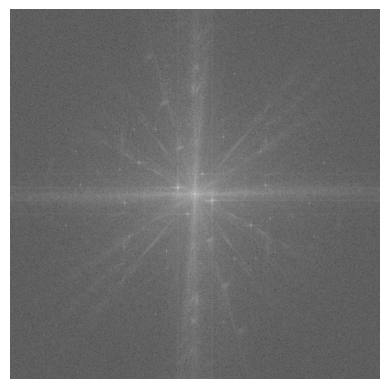

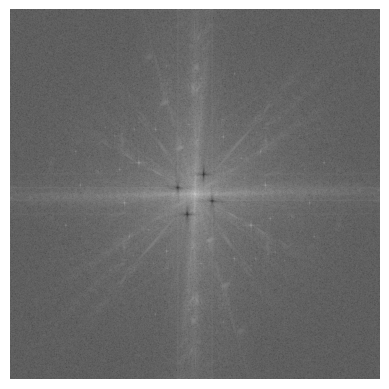

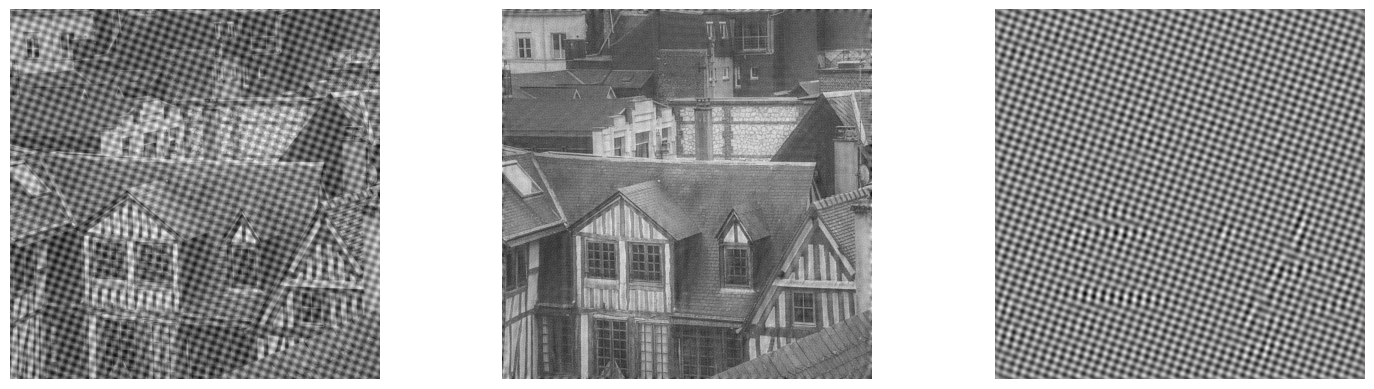

In [7]:
Y3 = [
np.abs(FiltroFourier(3, [], show=0)),
np.abs(FiltroFourier(3, [
    [464, 440, 600, 100, 0.08, 0],
    [464, 440, 100, 600, 0.08, 0],

    [385, 410, 600, 100, 0.08, 0],
    [385, 410, 100, 600, 0.08, 0],

    [444, 379, 600, 100, 0.06, 0],
    [444, 379, 100, 600, 0.06, 0],

    [407, 471, 600, 100, 0.06, 0],
    [407, 471, 100, 600, 0.06, 0],
], show=1)),
]

plot_all2(Y3 + [Y3[0] - Y3[1]], gray=True)

(851, 851)
(851, 851)


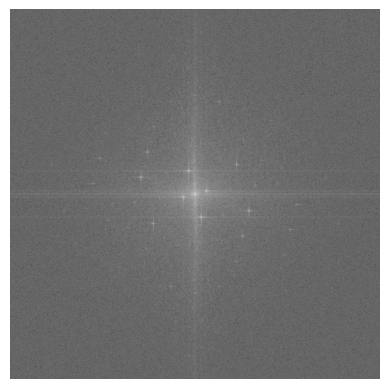

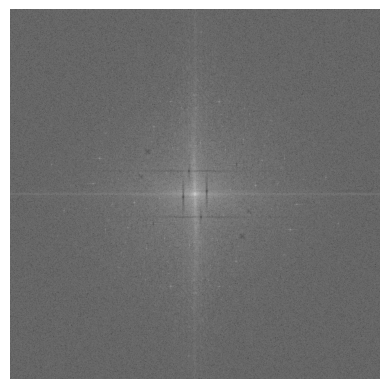

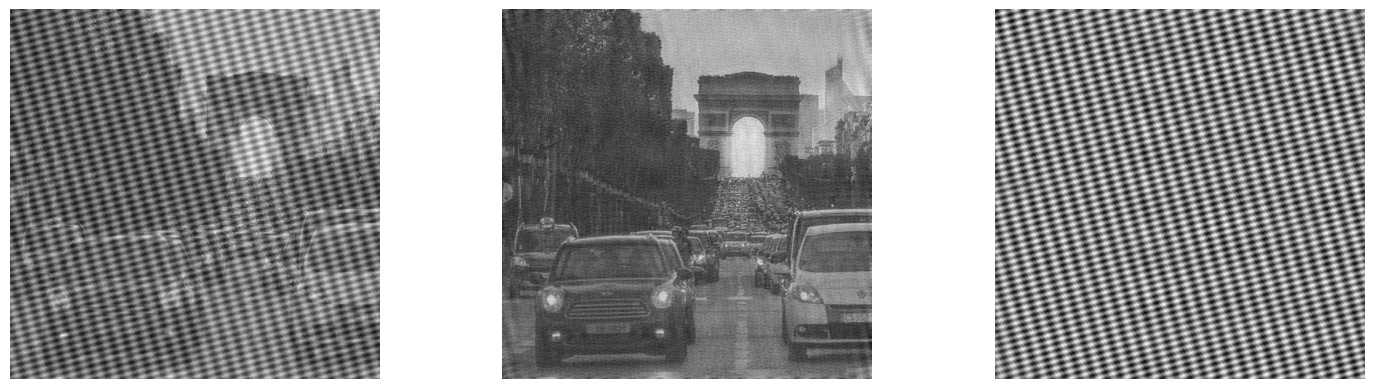

In [8]:
Y4 = [
np.abs(FiltroFourier(4, [], show=0)),
np.abs(FiltroFourier(4, [
    [411, 372,  15,  15, 0.5, 0, 1.0],
    [411, 372, 400,   7, 0.5, 0, 0.95],
    [411, 372,   7, 100, 0.5, 0, 1],

    [ 50, 372, 100,   1, 1.0, 0, 0.82],
    [200, 372, 300,   1, 1.0, 0, 0.80],

    [800, 372, 100,   1, 1.0, 0, 0.82],
    [651, 372, 300,   1, 1.0, 0, 0.80],

    [439, 478,  15,  15, 0.5, 0, 1.0],
    [439, 478, 400,   7, 0.5, 0, 0.95],
    [439, 478,   7, 100, 0.5, 0, 1],

    [ 50, 478, 100,   1, 1.0, 0, 0.82],
    [200, 478, 300,   1, 1.0, 0, 0.80],

    [800, 478, 100,   1, 1.0, 0, 0.82],
    [651, 478, 300,   1, 1.0, 0, 0.80],

    [398, 432,  15,  15, 0.5, 0, 1.0],
    [398, 432,   7, 100, 1.0, 0, 1.0],
    [398, 432, 100,   1, 1.0, 0, 1.0],

    [ 25, 432,  50,   1, 1.0, 0, 0.82],
    [150, 432, 300,   1, 1.0, 0, 0.82],
    [310, 432, 200,   1, 1.0, 0, 0.82],

    [825, 432,  50,   1, 1.0, 0, 0.82],
    [601, 432, 400,   1, 1.0, 0, 0.72],
    [775, 432, 150,   1, 1.0, 0, 0.72],

    [452, 418,  15,  15, 0.5, 0, 1.0],
    [452, 418,   7, 100, 1.0, 0, 1.0],
    [452, 418, 100,   1, 1.0, 0, 1.0],

    [ 25, 418,  50,   1, 1.0, 0, 0.82],
    [150, 418, 300,   1, 1.0, 0, 0.82],
    [310, 418, 200,   1, 1.0, 0, 0.82],

    [825, 418,  50,   1, 1.0, 0, 0.82],
    [601, 418, 400,   1, 1.0, 0, 0.72],
    [775, 418, 150,   1, 1.0, 0, 0.72],
    [775, 418, 150,   1, 1.0, 0, 0.72],

    [521, 357,   9,   9, 1.0, 0, 1],
    [521, 357,   1,  90, 1.0, 0, 1],

    [329, 493,   9,   9, 1.0, 0, 1],
    [329, 493,   1,  90, 1.0, 0, 1],

    [316, 328,   15,   15, 1.0, 0, 1],

    [534, 522,   15,   15, 1.0, 0, 1],

    [301, 386,  15,  15, 1.0, 0, 1],
    [301, 386,   1, 100, 0.9, 0, 0.7],
    [301, 386, 100,   1, 0.9, 0, 0.7],

    [549, 464,  15,  15, 1.0, 0, 1],
    [549, 464,   1, 100, 0.9, 0, 0.7],
    [549, 464, 100,   1, 0.9, 0, 0.7],

], show=1)),
]

plot_all2(Y4 + [Y4[0] - Y4[1]], gray=True)

(800, 800)
(800, 800)


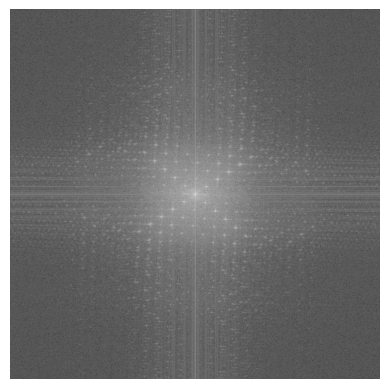

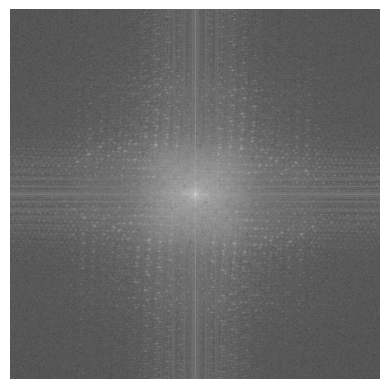

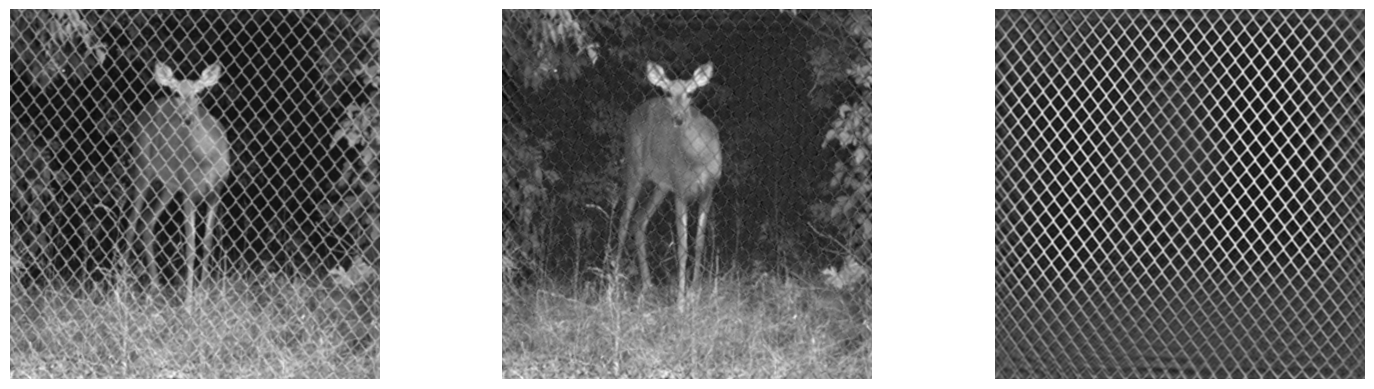

In [9]:
Y5 = [
np.abs(FiltroFourier(5, [], show=0)),
np.abs(FiltroFourier(5, [
    [378, 382,  17,  17,  0.4, 0],
    [356, 364,  17,  17,  0.5, 0],
    [334, 346,  19,  19,  0.5, 0],
    [312, 328,  19,  19,  0.5, 0],
    [290, 310,  19,  19,  0.5, 0],

    [422, 418,  17,  17,  0.4, 0],
    [444, 436,  17,  17,  0.5, 0],
    [466, 454,  19,  19,  0.5, 0],
    [488, 472,  19,  19,  0.5, 0],
    [510, 490,  19,  19,  0.5, 0],

    [424, 384,  17,  17,  0.4, 0],
    [449, 368,  17,  17,  0.5, 0],
    [473, 352,  19,  19,  0.5, 0],
    [497, 335,  19,  19,  0.5, 0],
    [522, 320,  19,  19,  0.5, 0],

    [376, 416,  17,  17,  0.4, 0],
    [351, 432,  17,  17,  0.5, 0],
    [327, 449,  19,  19,  0.5, 0],
    [303, 464,  19,  19,  0.5, 0],
    [279, 480,  19,  19,  0.5, 0],

    [403, 366,  15,  15,  0.5, 0, 0.80],
    [398, 434,  15,  15,  0.5, 0, 0.80],

    [427, 349,  15,  15,  0.5, 0, 0.96],
    [373, 451,  15,  15,  0.5, 0, 0.96],

    [420, 452,  15,  15,  0.5, 0, 0.90],
    [380, 348,  15,  15,  0.5, 0, 0.90],

    [405, 332,  15,  15,  0.5, 0, 0.90],
    [395, 468,  15,  15,  0.5, 0, 0.90],

    [359, 330,  15,  15,  0.5, 0, 0.90],
    [442, 470,  15,  15,  0.5, 0, 0.90],

    [383, 313,  15,  15,  0.5, 0, 0.90],
    [417, 487,  15,  15,  0.5, 0, 0.90],

    [371, 485,  15,  15,  0.5, 0, 0.90],
    [429, 315,  15,  15,  0.5, 0, 0.90],

    [451, 333,  15,  15,  0.5, 0, 0.90],
    [349, 466,  15,  15,  0.5, 0, 0.90],

    [408, 297,  15,  15,  0.5, 0, 0.84],
    [392, 503,  15,  15,  0.5, 0, 0.84],

    [332, 380,  15,  15,  0.5, 0, 0.84],
    [468, 420,  15,  15,  0.5, 0, 0.84],


    [337, 311,  15,  15,  0.5, 0, 0.96],
    [463, 489,  15,  15,  0.5, 0, 0.96],

    [325, 482,  15,  15,  0.5, 0, 0.96],
    [475, 318,  15,  15,  0.5, 0, 0.96],
], show=1)),
]

plot_all2(Y5 + [Y5[0] - Y5[1]], gray=True)

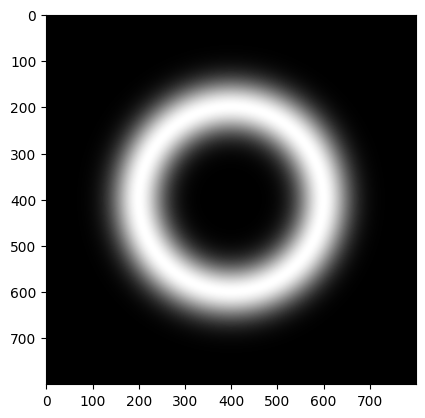

In [10]:
x, y = np.meshgrid(np.linspace(-1,1,800), np.linspace(-1,1,800))
d = np.sqrt(x*x+y*y)
sigma, mu = 0.1, 0.5
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
plt.imshow(g, cmap='gray')